#Classification
Classification is a fundamental task in machine learning, where the goal is to assign input data to one of several predefined categories or classes. This technique is widely used in various applications, such as image recognition, spam detection, and medical diagnosis. Classification models learn from labeled data, making predictions by recognizing patterns and features within the input data.

#The Problem with Multi-Class Classification
One of the challenges in traditional multi-class classification is that the model always makes a prediction, even when the input data does not belong to any of the predefined classes. This occurs because the softmax activation function, typically used in multi-class classification, forces the sum of the output probabilities to equal 100%. As a result, the model is compelled to select one of the classes, even when the input is irrelevant or does not contain any of the target classes.

#Addressing the Issue: Potential Solutions
To overcome this limitation, several approaches can be considered:

Bayesian Neural Networks (BNNs): BNNs incorporate uncertainty into their predictions, providing a measure of confidence in the output. This allows the model to express uncertainty when the input does not clearly belong to any class.
To see more about BNN : https://colab.research.google.com/drive/1Yw60JFnnsxU-4xNLkzOCci8KD49nGz8G?usp=sharing#scrollTo=_Ub9UZY1WaiV

Multi-Label Classification: Another effective solution is to reframe the problem as a multi-label classification task. In this approach, each class is treated independently, and a sigmoid activation function is used for each output neuron. This allows the model to output a probability for each class, which can then be thresholded to determine whether the class is present. This approach eliminates the issue of the model always predicting a class, as it allows for the possibility of no class being selected if all probabilities fall below the threshold. In that notebook we will explore how this approach can be applied to solve a multiclass classification problem.

# Traditional approach

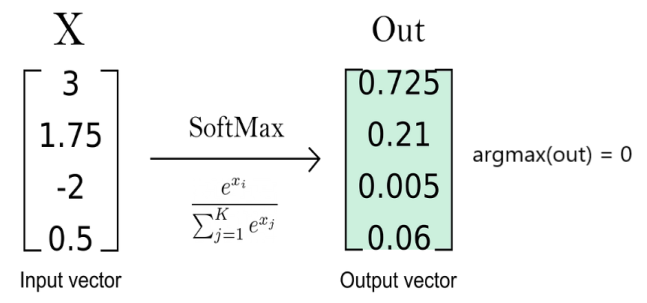

# Instead we will try that approach

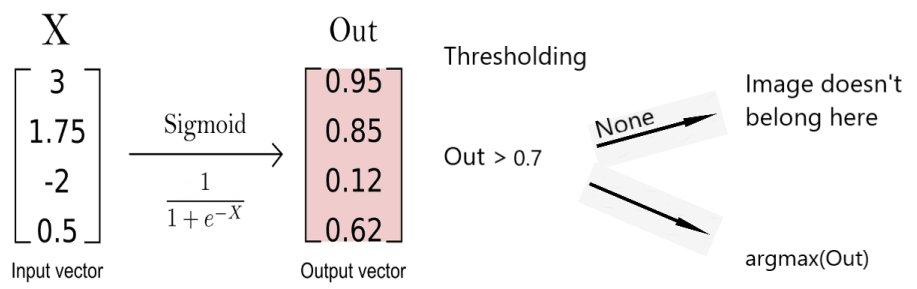

#Example
In this notebook, I will use the MNIST digits classification dataset  to demonstrate how a multi-label classification approach can address the issue of forced predictions in traditional multi-class classification [Keras MNIST documentation](https://keras.io/api/datasets/mnist/). This method will show how we can effectively handle cases where the input does not belong to any of the predefined classes, thereby improving the model's accuracy and reliability.

I will use the CIFAR-10 small images classification dataset as second input, which
includes images that do not belong to any of the predefined classes( MNIST digits ) [Keras CIFAR-10 documentation](https://keras.io/api/datasets/cifar10/).

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import cv2
import os
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
classes_Mnist = list(range(10))

In [ ]:
print("Train data shape is :",X_train.shape)
print("Test data shape is :",X_test.shape)

Train data shape is : (60000, 28, 28)
Test data shape is : (10000, 28, 28)


In [ ]:
# Normalizing images
X_train = X_train / 255
X_test = X_test / 255

# Traditional MultiClass Classification

In [ ]:
MCC = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(20, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
MCC.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

MCC.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8859 - loss: 0.3754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9881 - loss: 0.0370
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9942 - loss: 0.0188
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9948 - loss: 0.0158
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9965 - loss: 0.0104
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9971 - loss: 0.0084
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9975 - loss: 0.0082


In [ ]:
MCC.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0543


[0.040199246257543564, 0.9890999794006348]

In [ ]:
(x_train_c, y_train_c), (x_test_c, y_test_c) = keras.datasets.cifar10.load_data()
y_train_c = y_train_c.reshape(-1,)
y_test_c = y_test_c.reshape(-1,)

classes_cifar10 = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
x_train_c.shape

(50000, 32, 32, 3)

# Now we will see the results of multiclass classification, as discussed earlier, we anticipate that the model will predict one of the digits for each image, even if some images do not belong to the expected categories.

Mnist test Data
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


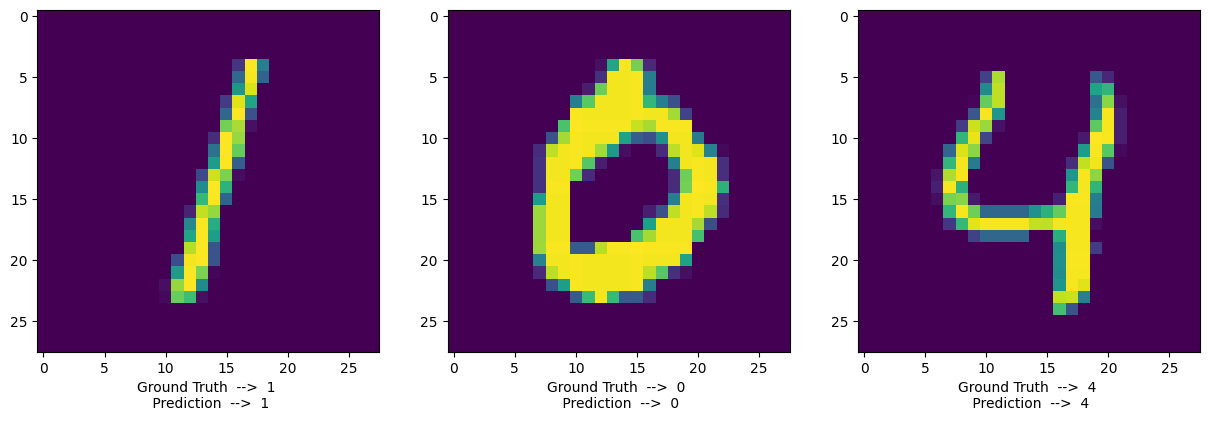

CIFAR test Data
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


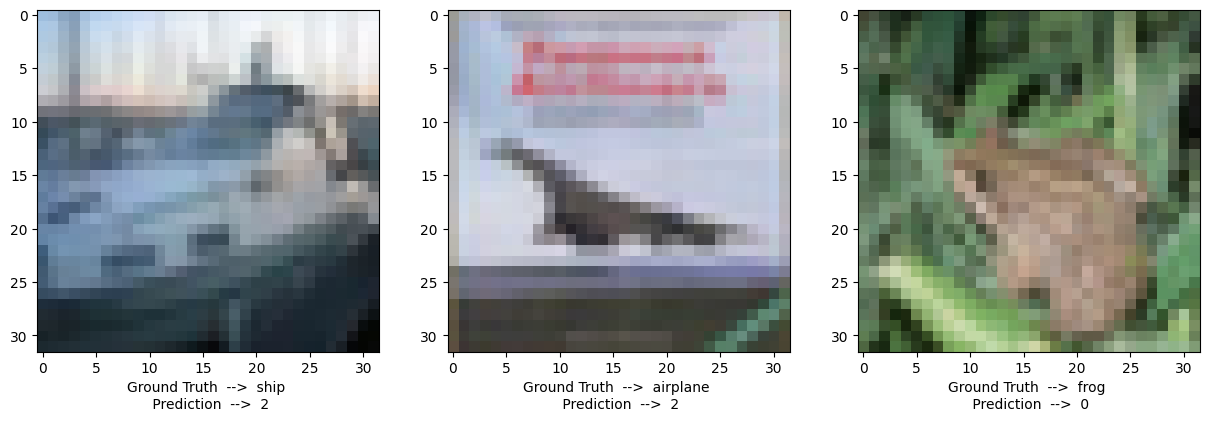

In [ ]:
# @title Traditional Multiclass classification Results
import numpy as np
import matplotlib.pyplot as plt

def plot_sample(Classifier, X, y, classIS, indices):

    if classIS =="classes_Mnist":
        classes=list(range(10))
    else:
        classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
        classesPred=list(range(10))
    plt.figure(figsize=(15, 5))

    for i in range(len(indices)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(X[indices[i]])

        if classIS =="classes_Mnist":
            pred = np.argmax(Classifier.predict(X[indices[i]:indices[i]+1]))
            plt.xlabel(f"Ground Truth  -->  {classes[y[indices[i]]]} \n Prediction  -->  {classes[pred]}")

        else:
            Index=indices[i]
            temp=(X[Index][:-4,:-4,0]+X[Index][:-4,:-4,1]+X[Index][:-4,:-4,2])/3
            input_image = temp.reshape(1, 28, 28)
            pred=np.argmax(Classifier.predict(input_image))
            plt.xlabel(f"Ground Truth  -->  {classes[y[indices[i]]]} \n Prediction  -->  {classesPred[pred]}")

    plt.show()

# classes_Mnist , classes_cifar10
print("Mnist test Data")
plot_sample(MCC, X_test, y_test, "classes_Mnist", list(range(2, 5)))
print("CIFAR test Data")
plot_sample(MCC, x_test_c, y_test_c, "classes_cifar10", list(range(2, 5)))

# Multilabel Classification

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(X_train[0].shape)

y_train[:5]

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Convert labels to one-hot encoded format
y_train_old=y_train
y_test_old=y_test
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
MLC = keras.Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(20, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),

    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
MLC.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

MLC.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8259 - loss: 0.1003
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9809 - loss: 0.0138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0068
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9941 - loss: 0.0048
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9952 - loss: 0.0039
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9962 - loss: 0.0031
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9967 - loss: 0.0030
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9977 - loss: 0.0022
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9975 - loss: 0.0019


In [ ]:
MLC.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0091


[0.007214508019387722, 0.9919000267982483]

In [ ]:
y_pred = MLC.predict(X_test)
x=y_pred[0]>0.7


if np.all(x < 0.7):
    result = "Image doesn't belong here"
else:
    argmax_index = np.argmax(x)
    result = f"{argmax_index}"

print(result)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


# Now we will investigate whether we can address the multiclass classification challenge by applying a multi-label classification approach.

Mnist test Data
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


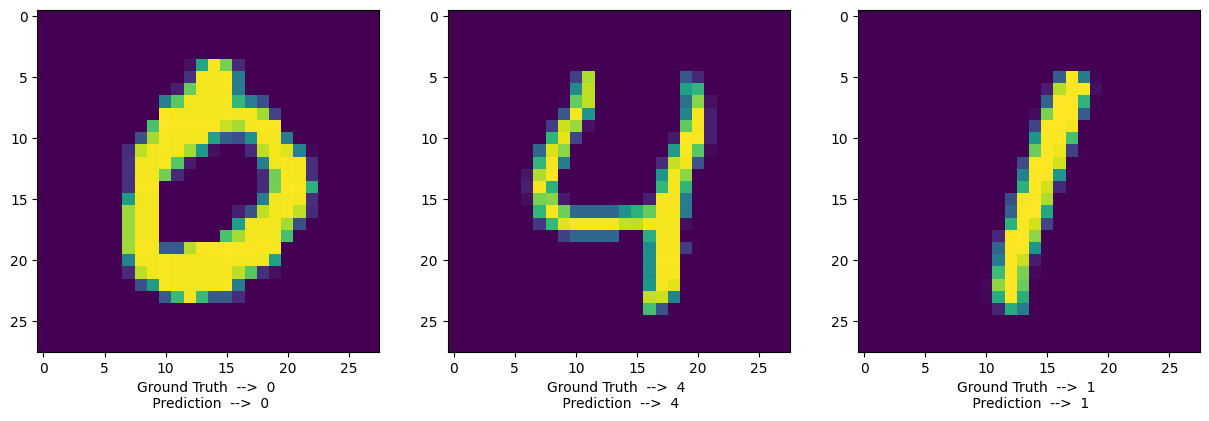

CIFAR test Data
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


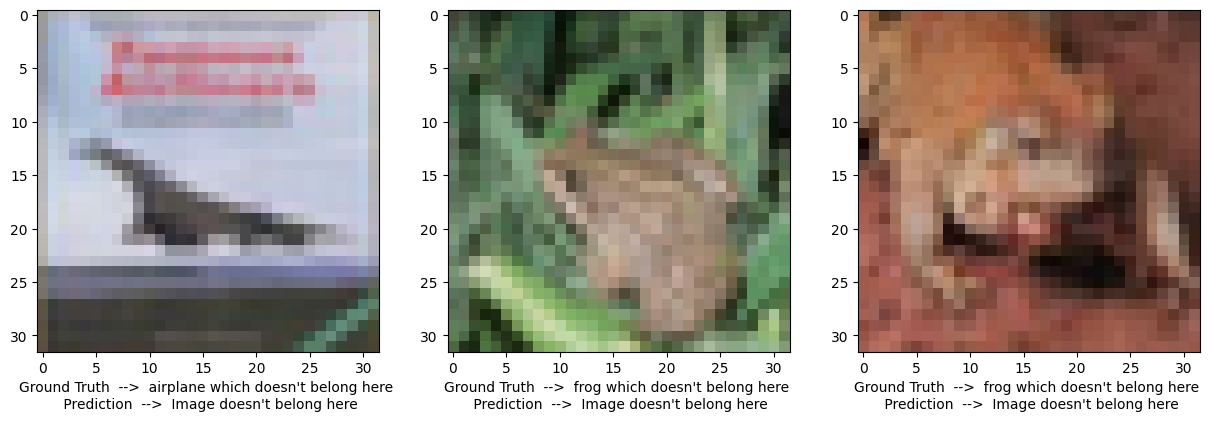

In [ ]:
# @title # Multilabel classification Results


def plot_sample(Classifier, X, y, classIS, indices):

    if classIS =="classes_Mnist":
        classes=list(range(10))
    else:
        classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
        classesPred=list(range(10))
    plt.figure(figsize=(15, 5))

    for i in range(len(indices)):
        plt.subplot(1, 3, i + 1)
        plt.imshow(X[indices[i]])

        if classIS =="classes_Mnist":
            pred=Classifier.predict(X[indices[i]:indices[i]+1])


            if np.all(pred[0] < 0.7):
                result = "Image doesn't belong here"
            else:
                argmax_index = np.argmax(pred[0])
                result = f"{classes[argmax_index]}"

            plt.xlabel(f"Ground Truth  -->  {classes[y[indices[i]]]} \n Prediction  -->  {result}")

        else:
            Index=indices[i]
            temp=(X[Index][:-4,:-4,0]+X[Index][:-4,:-4,1]+X[Index][:-4,:-4,2])/3
            input_image = temp.reshape(1, 28, 28)
            pred=Classifier.predict(input_image)

            if np.all(pred[0] < 0.7):
                result = "Image doesn't belong here"
            else:
                argmax_index = np.argmax(pred[0])
                result = f"{classesPred[argmax_index]}"

            plt.xlabel(f"Ground Truth  -->  {classes[y[indices[i]]]} which doesn't belong here \n Prediction  -->  {result}")

    plt.show()

# classes_Mnist , classes_cifar10
print("Mnist test Data")
plot_sample(MLC, X_test, y_test_old, "classes_Mnist", list(range(3, 6)))
print("CIFAR test Data")
plot_sample(MLC, x_test_c, y_test_c, "classes_cifar10", list(range(3, 6)))

#Done by Ahmad Maraqa

---


